This notebook illustrates a relatively simple approach to spatial anomaly detection. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import multivariate_normal

We begin by generating bivarate Gaussian distributions.

In [26]:
mean = np.array([0., 0.])
cov = np.array([[1.0, 0.0], 
                [0.0, 1.0]])

In [36]:
x, y = np.mgrid[-1.5:1.51:.03, -1.5:1.51:.03]
pos = np.dstack((x, y))

labels = ['Baseline', 'Train 1 (NA)', 'Train 2 (NA)', 'Train 3 (NA)', 'Train 4 (A)', 'Train 5 (A)', \
          'Train 6 (A)']

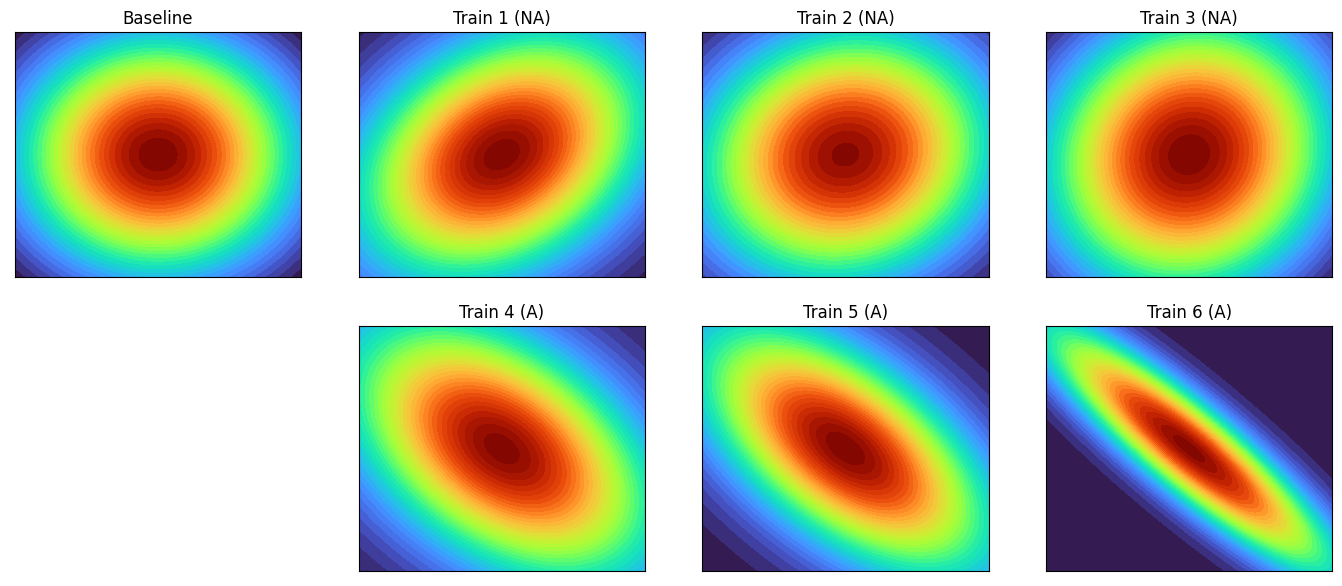

In [37]:
fig = plt.figure(figsize=(17,7))

plt.subplot(241)
rv1 = multivariate_normal(mean, cov)
c = plt.contourf(x, y, rv1.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[0])
plt.xticks([])
plt.yticks([])

plt.subplot(242)
rv2 = multivariate_normal(mean, cov + np.array([[0.0, 0.3], [0.3, 0.0]]) )
c = plt.contourf(x, y, rv2.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[1])
plt.xticks([])
plt.yticks([])

plt.subplot(243)
rv3 = multivariate_normal(mean, cov + np.array([[0.1, 0.1], [0.1, 0.1]]))
c = plt.contourf(x, y, rv3.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[2])
plt.xticks([])
plt.yticks([])

plt.subplot(244)
rv4 = multivariate_normal(mean, cov + np.array([[0.1, 0.4], [0.1, 0.4]]) )
c = plt.contourf(x, y, rv4.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[3])
plt.xticks([])
plt.yticks([])

plt.subplot(246)
rv5 = multivariate_normal(mean, cov + np.array([[0.1, -0.5], [-0.5, 0.1]]))
c = plt.contourf(x, y, rv5.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[4])
plt.xticks([])
plt.yticks([])

plt.subplot(247)
rv6 = multivariate_normal(mean, cov + np.array([[0.0, 0.6], [-0.6, 0.0]]))
c = plt.contourf(x, y, rv6.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[5])
plt.xticks([])
plt.yticks([])

plt.subplot(248)
rv7 = multivariate_normal(mean, cov + np.array([[0.0, 0.3], [-0.9, 0.0]]))
c = plt.contourf(x, y, rv7.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[6])
plt.xticks([])
plt.yticks([])

plt.show()

Our rule is that any distribution with a negative correlation is anomalous. 

In [38]:
def wasserstein_distance(mu_1, cov_1, mu_2, cov_2):
    sqrt_cov_1 = sc.linalg.sqrtm(cov_1)
    K1_K2_K1 = sqrt_cov_1 @ cov_2 @ sqrt_cov_1
    cov_dist = np.abs( np.trace(cov_1) + np.trace(cov_2) - 2 * np.trace(sc.linalg.sqrtm(K1_K2_K1)) )
    l2norm = np.sum(np.square(mu_1 - mu_2))
    d = np.real(np.sqrt(l2norm + cov_dist))
    return d

In [45]:
rv_list = [rv1, rv2, rv3, rv4]
distances_ok = []

for i in range(0, len(rv_list)):
    for j in range(0, len(rv_list)):
        if i > j:
            distances_ok.append(wasserstein_distance(rv_list[i].mean, rv_list[i].cov_object.covariance, \
                                             rv_list[j].mean, rv_list[j].cov_object.covariance))
            
            
rv_list = [rv1, rv2, rv3, rv4, rv5, rv6, rv7]
distances_all = []
combinations = []
for i in range(0, len(rv_list)):
    for j in range(0, len(rv_list)):
        if i > j:
            distances_all.append(wasserstein_distance(rv_list[i].mean, rv_list[i].cov_object.covariance, \
                                             rv_list[j].mean, rv_list[j].cov_object.covariance))
            combinations.append([i,j])
combinations = np.array(combinations)

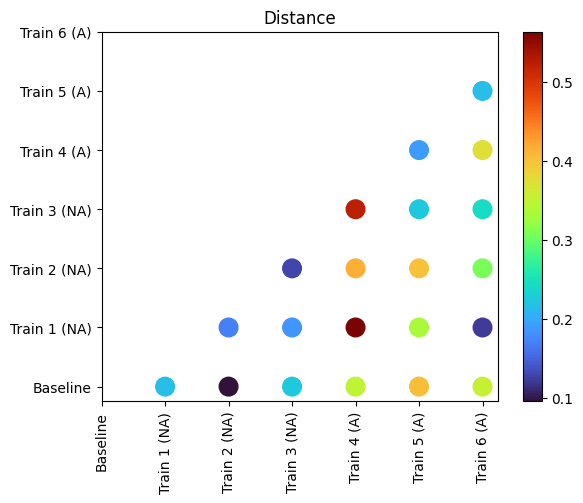

In [48]:
fig, ax = plt.subplots()
c = plt.scatter(combinations[:,0], combinations[:,1], c=distances_all, s=180, cmap=plt.cm.turbo)
plt.colorbar(c)

x = [0, 1, 2, 3, 4, 5, 6]

plt.xticks(x, labels, rotation='vertical')
plt.yticks(x, labels)
plt.title('Wasserstein distances')
plt.show()

Based on the above, we set 0.2 as our cut-off. Now let us generate some testing data -- some of which is anomalous and some of which isn't.